<a href="https://colab.research.google.com/github/SaadArqam/Team-Lassi/blob/main/Lassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Benford's Law Analysis on Air Quality Index of Indian Cities


## 👥 Team Members
- Vansh Agarwal- vansh.agrawal01@adypu.edu.in
- Saad Arqam- saad.arqam@adypu.edu.in
- Pathan Amaan- pathan.amaan@adypu.edu.in
- Premansh Behl- premansh.k@adypu.edu.in



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_id = '1v1S-Pp65r0xAjPFlNe5eAeonu_10u_jr'
csv_url = f'https://drive.google.com/uc?id={file_id}'


df = pd.read_csv(csv_url)
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",26-04-2025 18:00:00,24.792403,84.992416,NO2,1.0,8.0,5.0
1,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NO2,15.0,19.0,18.0
2,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NH3,3.0,4.0,3.0
3,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,SO2,8.0,11.0,9.0
4,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,OZONE,3.0,81.0,54.0


Preview Data

In [ ]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",26-04-2025 18:00:00,24.792403,84.992416,NO2,1.0,8.0,5.0
1,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NO2,15.0,19.0,18.0
2,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NH3,3.0,4.0,3.0
3,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,SO2,8.0,11.0,9.0
4,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,OZONE,3.0,81.0,54.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3168 non-null   object 
 1   state          3168 non-null   object 
 2   city           3168 non-null   object 
 3   station        3168 non-null   object 
 4   last_update    3168 non-null   object 
 5   latitude       3168 non-null   float64
 6   longitude      3168 non-null   float64
 7   pollutant_id   3168 non-null   object 
 8   pollutant_min  2983 non-null   float64
 9   pollutant_max  2983 non-null   float64
 10  pollutant_avg  2983 non-null   float64
dtypes: float64(5), object(6)
memory usage: 272.4+ KB


In [ ]:
df['pollutant_avg'].isna().sum()  # Check for missing values
df['pollutant_avg'] = pd.to_numeric(df['pollutant_avg'], errors='coerce')

Extract Leading Digits

In [ ]:
pollutant_avg = df['pollutant_avg'].dropna()

def get_leading_digit(number):
    number = abs(number)
    while number >= 10:
        number //= 10
    return int(str(number)[0]) if number != 0 else None

leading_digits = pollutant_avg.apply(get_leading_digit)
leading_digits = leading_digits[leading_digits > 0]



In [ ]:
leading_digits.head()

,pollutant_avg
0,5
1,1
2,3
3,9
4,5


Plot Benford’s Law

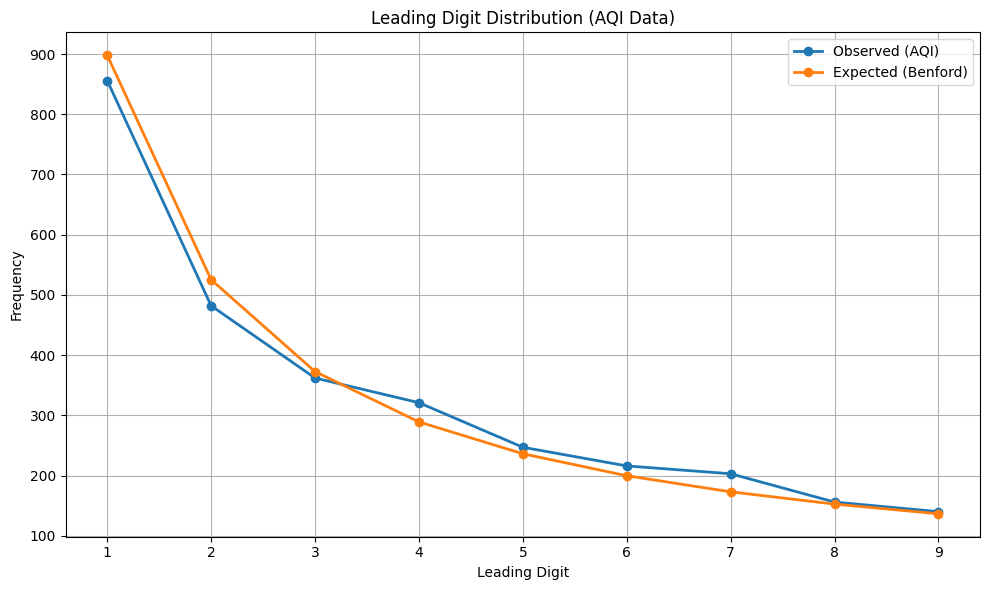

In [ ]:
# Calculate actual and expected frequencies
actual_counts = leading_digits.value_counts(normalize=False).sort_index()
benford_probs = {d: np.log10(1 + 1/d) for d in range(1, 10)}
expected_counts = {d: benford_probs[d] * len(leading_digits) for d in benford_probs}

# Convert to lists for plotting
digits = list(range(1, 10))
observed = [actual_counts.get(d, 0) for d in digits]
expected = [expected_counts.get(d, 0) for d in digits]

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(digits, observed, marker='o', label='Observed (AQI)', linewidth=2)
plt.plot(digits, expected, marker='o', label='Expected (Benford)', linewidth=2)

# Formatting
plt.title('Leading Digit Distribution (AQI Data)')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.xticks(digits)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📌 Interpretation:
- The distribution of leading digits in the AQI dataset mostly follows **Benford’s Law**.
- Digit **1** is the most frequent, followed by decreasing trends for 2–9.
- Minor deviations are expected due to data scope and measurement range.
- **Conclusion:** The AQI data appears to be natural and **not manipulated**, validating Benford’s Law.

---




## 💪 Contributions
- Vansh Agarwal: Statistical analysis & coding
- Saad Arqam: Data collection & coding
- Pathan Amaan: Visualization & graphs
- Premansh Behl: Summary & presentation